### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Simulation

The simulation follows these steps (1,000,000 runs):

<ol>
    <li>Create 52 cards, but we do not need the suits. Use the <b>repeat</b> in the <b>numpy</b> library to combine the ranks four times.</li>
    <li>Randomly select 5 cards from 52. I realize that we could just have easily created all possible combinations of 5 cards from 52, something I have done before, instead of randomly drawing.</li>
    <li>Check if the 5 card hand has an ace in it. The <b>isin</b> module returns an array with boolean values.</li>
    <li>If the returned array has "True" anywhere, that is, there is in fact an ace present in the hand, then we want to know where in the array it is. I incremented its location by one since Python indexes at 0, making it more intuitive when thinking about "when" the ace was "dealt".</li>
    <li>Append the location to a separate list called <b>first_ace_loc</b> to keep track.</li>
</ol>

In [2]:
#1. Create 52 cards without suits.
ranks = np.array(['2','3','4','5','6','7','8','9','T','J','Q','K','A'])
ranks = np.repeat(ranks, 4)

#List for saving location of first ace
first_ace_loc = []

i = 0
while i < 1000000:
    #2. Randomly select 5 cards from 52
    poker_hand = np.random.choice(ranks, size=5)
    
    #3. Check if the poker hand contains an ace. Returns bool array.
    has_ace = np.isin(poker_hand,'A')
    
    #4. If any element in returned bool array is true, then find the location(s).
    if np.any(has_ace) == True:
        ace = np.where(has_ace == True)
        #5. Append
        first_ace_loc.append(np.ndarray.min(ace[0]) + 1)
    else:
        #5. Append (unconditional)
        first_ace_loc.append(0)

    i += 1

## Results

Calculate the probability of the first ace by when it was dealt, <i>conditional on an ace being dealt.</i>

#### Conditional on Dealing an Ace

In [3]:
first_ace_array = np.asarray(first_ace_loc)
first_ace_array_cond = first_ace_array[np.where(first_ace_array != 0)]

#### Count Instances of First Ace by Card

We see from the resulting table that the probability decreases with each card dealt. The first ace appears in the first card dealt about 23% of the time, assuming an ace is dealt at all.

In [4]:
unique, counts = np.unique(first_ace_array_cond, return_counts=True)

In [5]:
table = np.column_stack((unique, counts/len(first_ace_array_cond)))
table

array([[ 1.        ,  0.23328403],
       [ 2.        ,  0.21623306],
       [ 3.        ,  0.19858014],
       [ 4.        ,  0.1832382 ],
       [ 5.        ,  0.16866457]])

#### Plot Results

<Container object of 5 artists>

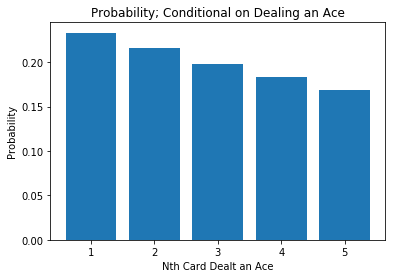

In [6]:
plt.title("Probability; Conditional on Dealing an Ace")
plt.xlabel("Nth Card Dealt an Ace")
plt.ylabel("Probability")
plt.bar(unique, counts/len(first_ace_array_cond))